In [162]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
url = 'https://www.google.com/flights/explore/#explore;f=SFO;t=r-China-0x31508e64e5c642c1%253A0x951daa7c349f366f;s=1;li=20;lx=40;d=2016-09-19'
driver = webdriver.PhantomJS()

In [181]:
dcap = dict(DesiredCapabilities.PHANTOMJS)

In [182]:
dcap['phantomjs.page.setting.userAgent'] = ("Mozilla/5.0 AppleWebKit/537.36 (KHTML, like Gecko; compatible; Googlebot/2.1; +http://www.google.com/bot.html) Safari/537.36")

In [183]:
driver = webdriver.PhantomJS(desired_capabilities=dcap,
service_args=['--ignore-ssl-errors=true'])

In [184]:
driver.implicitly_wait(20)
driver.get(url)

In [185]:
driver.save_screenshot(r'flight_explorer.png')

True

In [186]:
s = BeautifulSoup(driver.page_source,'lxml')

In [187]:
best_price_tags = s.findAll('div',"E036QED-w-e")
best_price = []
for tag in best_price_tags:
    try:
        best_price.append(int(tag.text.split('$')[1]))
    except ValueError:
        print (tag.text.split('$')[1])

In [189]:
#best_price_tags = s.findAll('div','E036QED-w-e')
best_price = best_price[0]

In [190]:
best_height_tags = s.findAll('div','E036QED-w-f')
best_height = []
for tag in best_height_tags:
    best_height.append(float(tag.attrs['style'].split('height: ')[1].replace('px;','')))

In [191]:
best_height = best_height[0]

In [192]:
pph = best_price/best_height
p = np.array(best_price)/np.array(best_height)

In [193]:
cities = s.findAll('div','E036QED-w-o')

In [194]:
cities[0].findAll('div','E036QED-w-x')[0]['style'].split('height: ')[1].replace('px;','')

'67.2706932745197'

In [195]:
hlist = []
for bar in cities[0].findAll('div','E036QED-w-x'):
    hlist.append(float(bar['style'].split('height: ')[1].replace('px;',''))*p)   

In [196]:
fares = pd.DataFrame(hlist,columns = ['price'])

In [197]:
fares.min()

price    478.0
dtype: float64

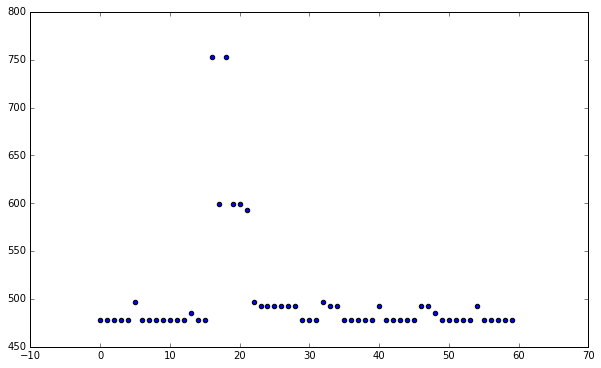

In [198]:
fig,ax = plt.subplots(figsize = (10,6))
plt.scatter(np.arange(len(fares['price'])),fares['price'])

In [199]:
px = [x for x in fares['price']]
ff = pd.DataFrame(px,columns = ['fare']).reset_index()

In [200]:
ff.ix[0,1] = 377
ff.ix[0,1]

377.0

In [201]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [202]:
X = StandardScaler().fit_transform(ff)
db = DBSCAN(eps = 1.3, min_samples = 1).fit(X)

//anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


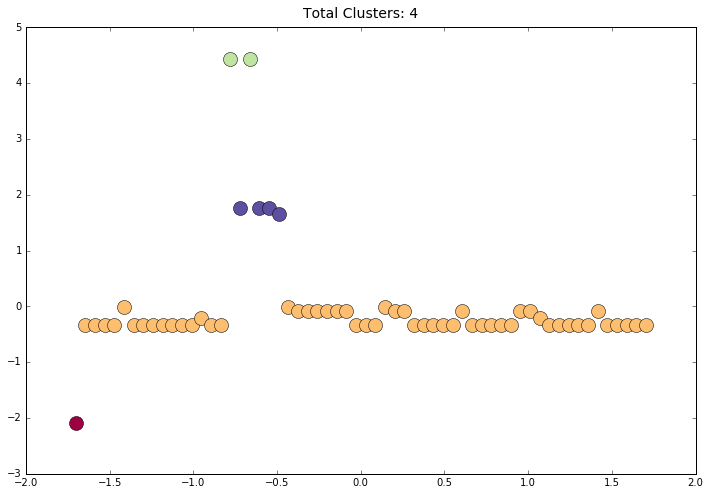

In [203]:
labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))
plt.subplots(figsize = (12,8))
for k,c in zip(unique_labels,colors):
    class_member_mask = (labels ==k)
    xy = X[class_member_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor = c,markeredgecolor = 'k',markersize = 14)
    
plt.title('Total Clusters: {}'.format(clusters),fontsize = 14,y = 1.01)

In [208]:
pf = pd.concat([ff,pd.DataFrame(labels,columns=['cluster'])],axis=1)

In [215]:
rf = pf.groupby('cluster')['fare'].agg(['min','max','count']).sort_values('min',ascending = True)

In [219]:
ff.min()

index      0.0
fare     377.0
dtype: float64

In [220]:
pf

,index,fare,cluster
0,0,377.000000,0
1,1,478.000000,1
2,2,478.000000,1
3,3,478.000000,1
4,4,478.000000,1
5,5,496.613240,1
6,6,478.000000,1
7,7,478.000000,1
8,8,478.000000,1
9,9,478.000000,1


In [221]:
rf

,min,max,count
cluster,,,
0,377.000000,377.000000,1
1,478.000000,496.613240,53
3,593.432107,599.086128,4
2,753.195746,753.195746,2


In [222]:
rf['count'].quantile(.10)

1.3